In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
# Convert driver_count in city data to integer
city_data_df["driver_count"] = city_data_df["driver_count"].astype(int)
city_data_df["driver_count"].dtype

dtype('int64')

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

## Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
# DELIVERABLE 1
#  1. Get the total rides for each city type
city_ride_count = pyber_data_df.groupby("type").count()["ride_id"]

In [5]:
# 2. Get the total drivers for each city type
city_driver_sum = city_data_df.groupby("type").sum()["driver_count"]

In [6]:
#  3. Get the total amount of fares for each city type
city_fare_sum = pyber_data_df.groupby("type").sum()["fare"]

In [7]:
#  4. Get the average fare per ride for each city type. 
ave_fare_ride = city_fare_sum/city_ride_count

In [8]:
# 5. Get the average fare per driver for each city type. 
ave_fare_driver = city_fare_sum/city_driver_sum

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": city_ride_count, "Total Drivers": city_driver_sum, 
                                  "Total Fares": city_fare_sum, "Average Fare per Ride": ave_fare_ride,
                                  "Average Fare per Driver": ave_fare_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)


pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [12]:
# DELIVERABLE 2
# 2. Using groupby() to create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date.
type_date_fare_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

In [13]:
# 3. Reset the index on the DataFrame you created in #2. This is needed to use the 'pivot()' function.
type_date_fare_df = type_date_fare_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' to get the total fares for each type of city by the date. 
pivot_table = type_date_fare_df.pivot(index="date", columns="type", values="fare")
pivot_table.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pivot_table_df = pivot_table.loc["2019-01-01":"2019-04-29",:]

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pivot_table_df.index = pd.to_datetime(pivot_table_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_table_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_table_df_week = pivot_table_df.resample("W").sum()
pivot_table_df_week.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


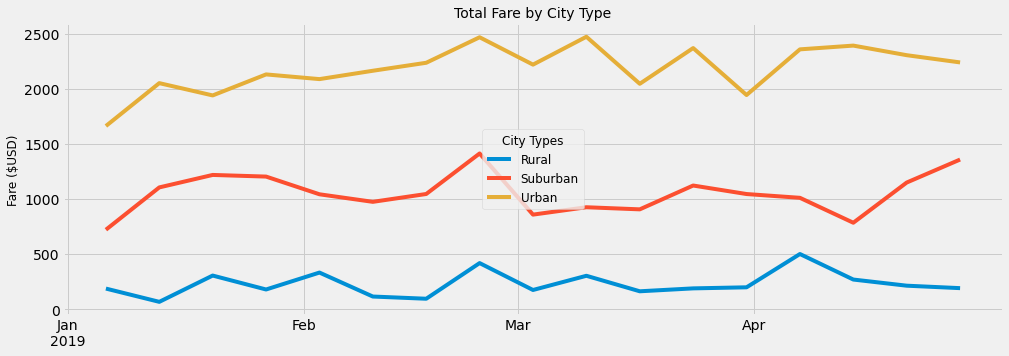

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.subplots(figsize=(15, 5))

plt.plot(pivot_table_df_week[["Rural","Suburban","Urban"]], label=["Rural","Suburban","Urban"])
plt.ylabel("Fare ($USD)", fontsize=12)
plt.title("Total Fare by City Type", fontsize=14)

lgnd = plt.legend(fontsize="12", mode="Expanded", loc=10, title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.xticks(["2019-01-01","2019-02-01","2019-03-01","2019-04-01"],[("Jan"+"\n"+"2019"), "Feb", "Mar", "Apr"])

plt.savefig("analysis/PyBer_fare_summary.png", bbox_inches="tight")

plt.show()